In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from matplotlib.pyplot import figure

In [2]:

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
display(data)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


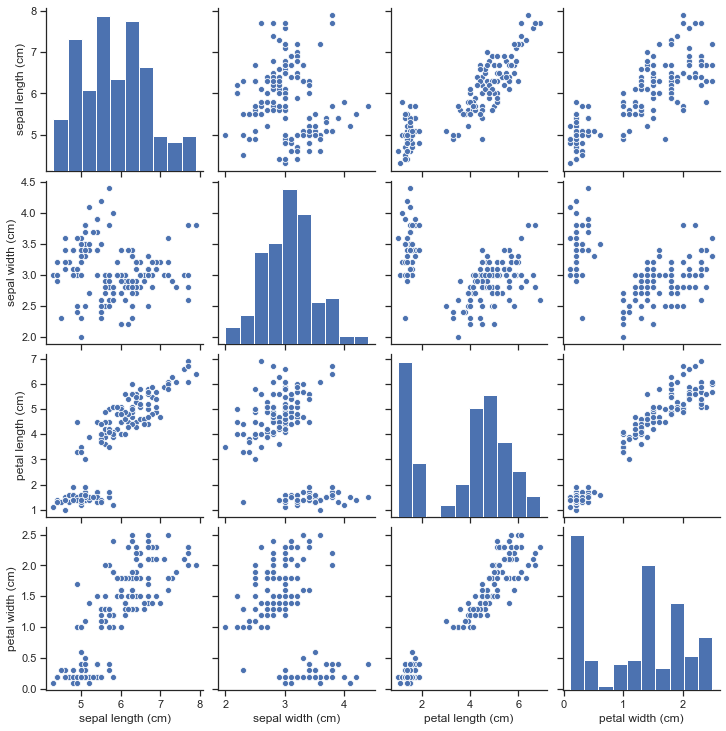

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, palette="husl")

<AxesSubplot:>

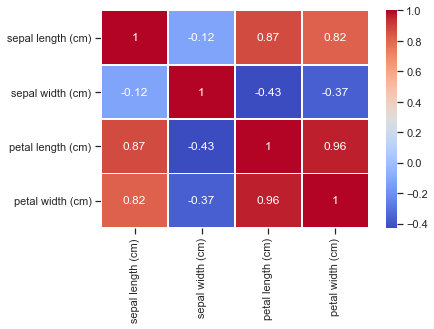

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

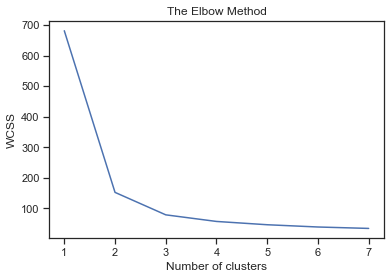

In [7]:
X = data.values
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
d = davies_bouldin_score(X, y_kmeans)
print("davies_bouldin_score: %f" % (d))

davies_bouldin_score: 0.661972


In [10]:

s = silhouette_score(X, y_kmeans, random_state=42)
print("silhouette_score: %f" % (s))

silhouette_score: 0.552819


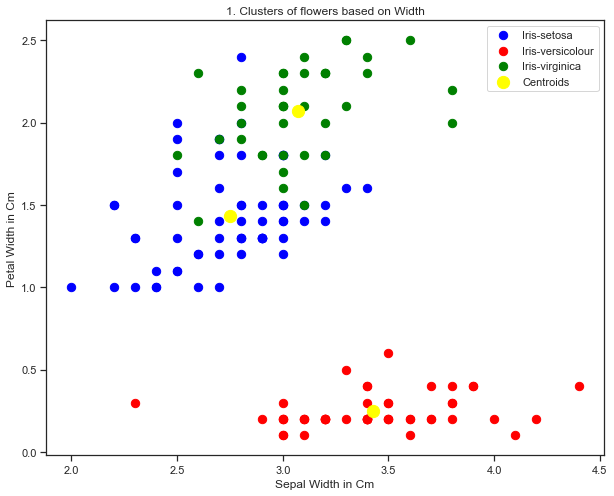

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 3], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 3], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 3], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('1. Clusters of flowers based on Width')
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Petal Width in Cm')
plt.legend()
plt.show()

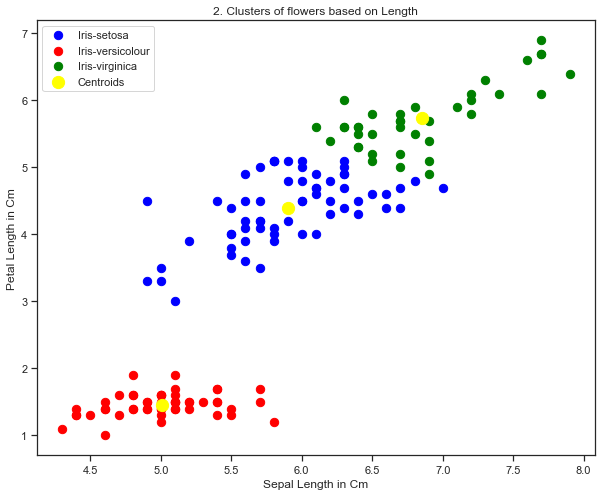

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('2. Clusters of flowers based on Length')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Petal Length in Cm')
plt.legend()
plt.show()

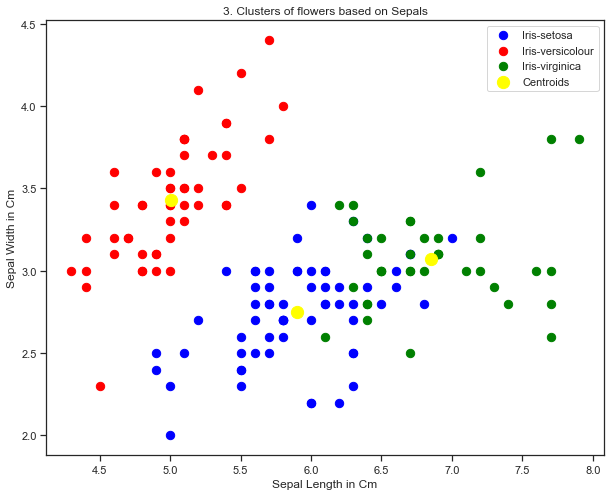

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('3. Clusters of flowers based on Sepals')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.legend()
plt.show()

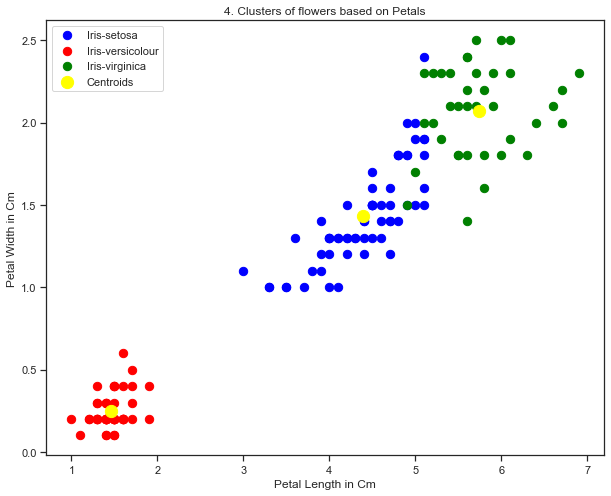

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 70, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s = 150, c = 'yellow', label = 'Centroids')
plt.title('4. Clusters of flowers based on Petals')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.legend()
plt.show()